In [ ]:
# Table of Contents

# 01. Introductions
# 02. KNN Classifier
# 03. Naive Bayes Classifier
# 04. Decision trees and Random Forest
# 05. SVM
# 06. Logistic Regression
# 07. Neural Networks
# 08. Imbalance Solutions

In [11]:
# 01. Introductions

# Classification is a kind of supervised learning. It is used to predict the value in a nominal variable 
# which is also called 'label'. The factors that are used for predictions are called features.

import numpy as np
import scipy as sp
import pandas as pd
from IPython.display import display, HTML

df=pd.read_csv('data_students.csv')
cols=df.columns
# print out and display dataframe as tables in HTML
display(HTML(df.head(10).to_html()))

# replace missing values in numerical variables by using mean value #################################
df["Age"].fillna(df["Age"].mean(), inplace=True)
df["Hours on Assignments"].fillna(df["Hours on Assignments"].mean(), inplace=True)
df["Hours on Games"].fillna(df["Hours on Games"].mean(), inplace=True)
df["Exam"].fillna(df["Exam"].mean(), inplace=True)
df["Grade"].fillna(df["Grade"].mean(), inplace=True)

# check again whether there are missing values
print('ColumnName, DataType, MissingValues')
for i in cols:
    print(i, ',', df[i].dtype,',',df[i].isnull().any())
 
# remove column ID
df=df.drop('ID',1)

# print out and display dataframe as tables in HTML
display(HTML(df.head(10).to_html()))

,ID,Nationality,Gender,Age,Degree,Hours on Readings,Hours on Assignments,Hours on Games,Hours on Internet,Exam,Grade,GradeLetter
0,1,China,1,23.0,PHD,9,2.0,2.0,11,81.80,79.50,B
1,2,China,1,21.0,PHD,9,2.0,2.0,11,88.96,88.46,A
2,3,China,1,24.0,PHD,9,2.0,2.0,11,88.16,87.00,B
3,4,China,1,20.0,PHD,9,2.0,2.0,11,73.57,79.70,B
4,5,China,1,22.0,PHD,9,2.0,2.0,11,78.07,78.94,C
5,6,China,1,18.0,PHD,9,2.0,2.0,11,NaN,77.78,C
6,7,China,1,25.0,PHD,9,2.0,2.0,11,77.77,70.94,C
7,8,China,1,19.0,PHD,9,2.0,2.0,11,73.95,79.26,B
8,9,China,1,25.0,PHD,9,2.0,NaN,11,73.23,75.08,C
9,10,China,1,NaN,PHD,9,2.0,2.0,11,75.60,85.81,B


ColumnName, DataType, MissingValues
ID , int64 , False
Nationality , object , False
Gender , int64 , False
Age , float64 , False
Degree , object , False
Hours on Readings , int64 , False
Hours on Assignments , float64 , False
Hours on Games , float64 , False
Hours on Internet , int64 , False
Exam , float64 , False
Grade , float64 , False
GradeLetter , object , False


,Nationality,Gender,Age,Degree,Hours on Readings,Hours on Assignments,Hours on Games,Hours on Internet,Exam,Grade,GradeLetter
0,China,1,23.000000,PHD,9,2.0,2.000000,11,81.800000,79.50,B
1,China,1,21.000000,PHD,9,2.0,2.000000,11,88.960000,88.46,A
2,China,1,24.000000,PHD,9,2.0,2.000000,11,88.160000,87.00,B
3,China,1,20.000000,PHD,9,2.0,2.000000,11,73.570000,79.70,B
4,China,1,22.000000,PHD,9,2.0,2.000000,11,78.070000,78.94,C
5,China,1,18.000000,PHD,9,2.0,2.000000,11,77.860714,77.78,C
6,China,1,25.000000,PHD,9,2.0,2.000000,11,77.770000,70.94,C
7,China,1,19.000000,PHD,9,2.0,2.000000,11,73.950000,79.26,B
8,China,1,25.000000,PHD,9,2.0,8.827586,11,73.230000,75.08,C
9,China,1,21.892857,PHD,9,2.0,2.000000,11,75.600000,85.81,B


Column Datatypes:
 Nationality              object
Gender                    int64
Age                     float64
Degree                   object
Hours on Readings         int64
Hours on Assignments    float64
Hours on Games          float64
Hours on Internet         int64
Exam                    float64
Grade                   float64
GradeLetter              object
dtype: object


'Data Example:'

,Gender,Age,Hours on Readings,Hours on Assignments,Hours on Games,Hours on Internet,Exam,Grade,GradeLetter,Degree_ BS,Degree_ MS,Degree_ PHD,Nationality_ China,Nationality_ France,Nationality_ Spain
0,1,23.000000,9,2.0,2.000000,11,81.800000,79.50,B,0,0,1,1,0,0
1,1,21.000000,9,2.0,2.000000,11,88.960000,88.46,A,0,0,1,1,0,0
2,1,24.000000,9,2.0,2.000000,11,88.160000,87.00,B,0,0,1,1,0,0
3,1,20.000000,9,2.0,2.000000,11,73.570000,79.70,B,0,0,1,1,0,0
4,1,22.000000,9,2.0,2.000000,11,78.070000,78.94,C,0,0,1,1,0,0
5,1,18.000000,9,2.0,2.000000,11,77.860714,77.78,C,0,0,1,1,0,0
6,1,25.000000,9,2.0,2.000000,11,77.770000,70.94,C,0,0,1,1,0,0
7,1,19.000000,9,2.0,2.000000,11,73.950000,79.26,B,0,0,1,1,0,0
8,1,25.000000,9,2.0,8.827586,11,73.230000,75.08,C,0,0,1,1,0,0
9,1,21.892857,9,2.0,2.000000,11,75.600000,85.81,B,0,0,1,1,0,0


Selected numerical columns:
 ['Gender', 'Age', 'Hours on Readings', 'Hours on Assignments', 'Hours on Games', 'Hours on Internet', 'Exam', 'Grade']


,Gender,Age,Hours on Readings,Hours on Assignments,Hours on Games,Hours on Internet,Exam,Grade,GradeLetter,Degree_ BS,Degree_ MS,Degree_ PHD,Nationality_ China,Nationality_ France,Nationality_ Spain
0,1.0,0.625000,0.583333,0.0,0.000000,1.0,0.697621,0.613475,B,0,0,1,1,0,0
1,1.0,0.375000,0.583333,0.0,0.000000,1.0,0.824751,0.800375,A,0,0,1,1,0,0
2,1.0,0.750000,0.583333,0.0,0.000000,1.0,0.810547,0.769921,B,0,0,1,1,0,0
3,1.0,0.250000,0.583333,0.0,0.000000,1.0,0.551491,0.617647,B,0,0,1,1,0,0
4,1.0,0.500000,0.583333,0.0,0.000000,1.0,0.631392,0.601794,C,0,0,1,1,0,0
5,1.0,0.000000,0.583333,0.0,0.000000,1.0,0.627676,0.577597,C,0,0,1,1,0,0
6,1.0,0.875000,0.583333,0.0,0.000000,1.0,0.626065,0.434919,C,0,0,1,1,0,0
7,1.0,0.125000,0.583333,0.0,0.000000,1.0,0.558239,0.608469,B,0,0,1,1,0,0
8,1.0,0.875000,0.583333,0.0,0.568966,1.0,0.545455,0.521277,C,0,0,1,1,0,0
9,1.0,0.486607,0.583333,0.0,0.000000,1.0,0.587536,0.745098,B,0,0,1,1,0,0


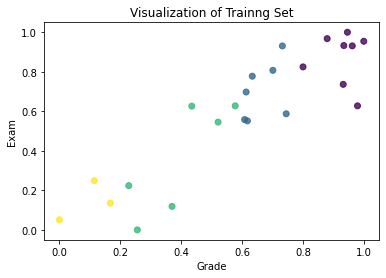

K = 1 , Accuracy:  1.0 , Precision:  1.0 , Recall:  1.0
K = 3 , Accuracy:  0.8333333333333334 , Precision:  0.8333333333333334 , Recall:  0.8333333333333334
K = 5 , Accuracy:  0.5 , Precision:  0.5 , Recall:  0.5
K = 7 , Accuracy:  0.6666666666666666 , Precision:  0.6666666666666666 , Recall:  0.6666666666666666
K = 9 , Accuracy:  0.8333333333333334 , Precision:  0.8333333333333334 , Recall:  0.8333333333333334
K = 11 , Accuracy:  1.0 , Precision:  1.0 , Recall:  1.0
K = 13 , Accuracy:  1.0 , Precision:  1.0 , Recall:  1.0
K = 15 , Accuracy:  0.8333333333333334 , Precision:  0.8333333333333334 , Recall:  0.8333333333333334
K = 17 , Accuracy:  0.6666666666666666 , Precision:  0.6666666666666666 , Recall:  0.6666666666666666
K = 19 , Accuracy:  0.5 , Precision:  0.5 , Recall:  0.5
K = 21 , Accuracy:  0.0 , Precision:  0.0 , Recall:  0.0
K = 23 , Accuracy:  0.0 , Precision:  0.0 , Recall:  0.0


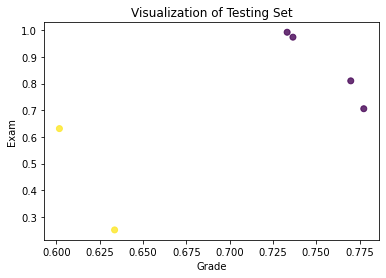

C:\Users\ZHENGYONG\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:666: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=5.
  warnings.warn(("The least populated class in y has only %d"
C:\Users\ZHENGYONG\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:666: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=5.
  warnings.warn(("The least populated class in y has only %d"
C:\Users\ZHENGYONG\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:666: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=5.
  warnings.warn(("The least populated class in y has only %d"
C:\Users\ZHENGYONG\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:666: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=5.
  warnings.warn(("The least populated class in y has only %d"
C:\Users\ZHENGYONG\anaconda3

K = 1 , Accuracy:  0.4666666666666667
K = 3 , Accuracy:  0.4333333333333333
K = 5 , Accuracy:  0.4333333333333333
K = 7 , Accuracy:  0.36666666666666664
K = 9 , Accuracy:  0.4666666666666667


C:\Users\ZHENGYONG\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:666: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=5.
  warnings.warn(("The least populated class in y has only %d"
C:\Users\ZHENGYONG\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:666: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=5.
  warnings.warn(("The least populated class in y has only %d"
C:\Users\ZHENGYONG\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:666: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=5.
  warnings.warn(("The least populated class in y has only %d"
C:\Users\ZHENGYONG\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:666: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=5.
  warnings.warn(("The least populated class in y has only %d"
C:\Users\ZHENGYONG\anaconda3

K = 11 , Accuracy:  0.4333333333333333
K = 13 , Accuracy:  0.36666666666666664
K = 15 , Accuracy:  0.36666666666666664
K = 17 , Accuracy:  0.4333333333333333
K = 19 , Accuracy:  0.4333333333333333


In [12]:
# 02. KNN Classifier ################################################################################
# Requirements: 1). numerical features; 2). normalized features
# Parameters: distance measure and value of K


# Data preprocessing ################################################################################
print('Column Datatypes:\n',df.dtypes)
# convert all nominal variables to binary variables
df_raw=df.copy(deep=True) 
df_knn=df.copy(deep=True) 
# create new binary columns
df_dummies=pd.get_dummies(df_knn[['Degree','Nationality']])
# add them to dataframe
df_knn=df_knn.join(df_dummies)
# drop original columns
df_knn=df_knn.drop('Degree',axis=1)
df_knn=df_knn.drop('Nationality', axis=1)

display('Data Example:',HTML(df_knn.head(10).to_html()))

# Normalized all numerical features
# find numeric columns
numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
cols_numeric = df_knn.select_dtypes(include=numerics).columns.tolist()
print('Selected numerical columns:\n',cols_numeric)    

# min-max normalization to scale [0, 1]
for col in cols_numeric:
    df_knn[col]=(df_knn[col]-df_knn[col].min())/(df_knn[col].max()-df_knn[col].min())

display(HTML(df_knn.head(10).to_html()))

# Build KNN models and evaluate the models ############################################################

# By hold-out evaluations ###############################################
from sklearn.model_selection import train_test_split
from matplotlib import pyplot as plt
import matplotlib as mpl
import seaborn as sns

# preprocess label, since KNN requires label encoding
from sklearn import preprocessing


y = df_knn['GradeLetter'] # define label as nominal values
le = preprocessing.LabelEncoder()
le.fit(y)
y_encoded = le.transform(y) # encode nominal labels to integers #####################################

df_knn['GradeLetter'] = y_encoded
x = df_knn.drop('GradeLetter',1)
y = df_knn['GradeLetter'] 

x_train, x_test, y_train, y_test = train_test_split(df_knn, y_encoded, test_size=0.2)
# print(type(y_train), 'count of unique values = ', y_train.unique().size)

# Visualize train set
plt.figure(1)
plt.scatter(x_train['Grade'], x_train['Exam'], c=y_train, alpha = 0.8)
plt.xlabel('Grade')
plt.ylabel('Exam')
plt.title('Visualization of Trainng Set')
plt.show()
plt.close()

# build and eval models
from sklearn import neighbors
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score

# API for KNeighborsClassifier
# https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html

for k in range(1, 24, 2): 
    clf=neighbors.KNeighborsClassifier(k, weights='uniform')
    clf.fit(x_train, y_train)
    y_pred = clf.predict(x_test)
    print('K =', k, ', Accuracy: ', accuracy_score(y_test, y_pred), ', Precision: ', precision_score(y_test, y_pred, average='micro'),
         ', Recall: ', recall_score(y_test, y_pred, average='micro'))
    
# Visualize the best model on the test set
clf=neighbors.KNeighborsClassifier(1, weights='uniform')
clf.fit(x_train, y_train)
y_pred = clf.predict(x_test)

plt.figure(2)
plt.scatter(x_test['Grade'], x_test['Exam'], c=y_pred, alpha = 0.8)
plt.xlabel('Grade')
plt.ylabel('Exam')
plt.title('Visualization of Testing Set')
plt.show()
plt.close()


# By N-fold cross evaluations ###############################################
from sklearn.model_selection import cross_val_score

for k in range(1, 20, 2): 
    clf=neighbors.KNeighborsClassifier(k, weights='uniform')
    acc=cross_val_score(clf, x, y, cv=5, scoring='accuracy').mean()
    print('K =', k, ', Accuracy: ',acc)

In [40]:
# 03. Naive Bayes Classifier ################################################################################
# Requirements: 1). nominal features; 2). assumption of conditionally indepenence
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.model_selection import cross_val_score

# Pre-processing ###############################################
print('Column data types:\n',df_raw.dtypes)
df_nb=df_raw.copy(deep=True)

# convert numerical to categorical data, e.g., Age #################################
df_nb['Gender'] = pd.cut(df_nb['Gender'],2)
df_nb['Age'] = pd.cut(df_nb['Age'],3)
df_nb['Hours on Readings'] = pd.cut(df_nb['Hours on Readings'],3)
df_nb['Hours on Assignments'] = pd.cut(df_nb['Hours on Assignments'],3)
df_nb['Hours on Games'] = pd.cut(df_nb['Hours on Games'],3)
df_nb['Hours on Internet'] = pd.cut(df_nb['Hours on Internet'],3)
df_nb['Exam'] = pd.cut(df_nb['Exam'],3)
df_nb['Grade'] = pd.cut(df_nb['Grade'],3)

display('Data Example',HTML(df_nb.head(5).to_html()))

# by hold-out evaluation ###########################################################
y=df_nb['GradeLetter']
le = preprocessing.LabelEncoder()
le.fit(y)
y_encoded = le.transform(y) # encode nominal labels to integers #####################################

# transform categorical data to numerical data, i.e., one-hot encoding
print(df_nb.dtypes)
df_nb=pd.get_dummies(df_nb.drop('GradeLetter',axis=1))
df_nb['GradeLetter']=y_encoded
display(HTML(df_nb.head(5).to_html()))

# API for GaussianNB
# https://scikit-learn.org/stable/modules/generated/sklearn.naive_bayes.GaussianNB.html#sklearn.naive_bayes.GaussianNB

x_train, x_test, y_train, y_test = train_test_split(df_nb, y_encoded, test_size=0.2)

clf = GaussianNB()
clf.fit(x_train, y_train)
y_pred=clf.predict(x_test)
print("Accuracy by Hold-out Eval:",accuracy_score(y_pred,y_test))

# by N-fold evaluation ###########################################################
y=df_nb['GradeLetter']
x=df_nb.drop('GradeLetter',axis=1)
clf = GaussianNB()
acc=cross_val_score(clf, x, y, cv=5, scoring='accuracy').mean()
print("Accuracy by N-fold Cross Validation:",acc)

Column data types:
 Nationality              object
Gender                    int64
Age                     float64
Degree                   object
Hours on Readings         int64
Hours on Assignments    float64
Hours on Games          float64
Hours on Internet         int64
Exam                    float64
Grade                   float64
GradeLetter              object
dtype: object


'Data Example'

,Nationality,Gender,Age,Degree,Hours on Readings,Hours on Assignments,Hours on Games,Hours on Internet,Exam,Grade,GradeLetter
0,China,"(0.5, 1.0]","(20.667, 23.333]",PHD,"(6.0, 10.0]","(1.994, 4.0]","(1.988, 6.0]","(7.333, 11.0]","(80.057, 98.83]","(66.07, 82.05]",B
1,China,"(0.5, 1.0]","(20.667, 23.333]",PHD,"(6.0, 10.0]","(1.994, 4.0]","(1.988, 6.0]","(7.333, 11.0]","(80.057, 98.83]","(82.05, 98.03]",A
2,China,"(0.5, 1.0]","(23.333, 26.0]",PHD,"(6.0, 10.0]","(1.994, 4.0]","(1.988, 6.0]","(7.333, 11.0]","(80.057, 98.83]","(82.05, 98.03]",B
3,China,"(0.5, 1.0]","(17.992, 20.667]",PHD,"(6.0, 10.0]","(1.994, 4.0]","(1.988, 6.0]","(7.333, 11.0]","(61.283, 80.057]","(66.07, 82.05]",B
4,China,"(0.5, 1.0]","(20.667, 23.333]",PHD,"(6.0, 10.0]","(1.994, 4.0]","(1.988, 6.0]","(7.333, 11.0]","(61.283, 80.057]","(66.07, 82.05]",C


Nationality               object
Gender                  category
Age                     category
Degree                    object
Hours on Readings       category
Hours on Assignments    category
Hours on Games          category
Hours on Internet       category
Exam                    category
Grade                   category
GradeLetter               object
dtype: object


,Nationality_ China,Nationality_ France,Nationality_ Spain,"Gender_(-0.001, 0.5]","Gender_(0.5, 1.0]","Age_(17.992, 20.667]","Age_(20.667, 23.333]","Age_(23.333, 26.0]",Degree_ BS,Degree_ MS,Degree_ PHD,"Hours on Readings_(1.988, 6.0]","Hours on Readings_(6.0, 10.0]","Hours on Readings_(10.0, 14.0]","Hours on Assignments_(1.994, 4.0]","Hours on Assignments_(4.0, 6.0]","Hours on Assignments_(6.0, 8.0]","Hours on Games_(1.988, 6.0]","Hours on Games_(6.0, 10.0]","Hours on Games_(10.0, 14.0]","Hours on Internet_(-0.011, 3.667]","Hours on Internet_(3.667, 7.333]","Hours on Internet_(7.333, 11.0]","Exam_(42.454, 61.283]","Exam_(61.283, 80.057]","Exam_(80.057, 98.83]","Grade_(50.042, 66.07]","Grade_(66.07, 82.05]","Grade_(82.05, 98.03]",GradeLetter
0,1,0,0,0,1,0,1,0,0,0,1,0,1,0,1,0,0,1,0,0,0,0,1,0,0,1,0,1,0,1
1,1,0,0,0,1,0,1,0,0,0,1,0,1,0,1,0,0,1,0,0,0,0,1,0,0,1,0,0,1,0
2,1,0,0,0,1,0,0,1,0,0,1,0,1,0,1,0,0,1,0,0,0,0,1,0,0,1,0,0,1,1
3,1,0,0,0,1,1,0,0,0,0,1,0,1,0,1,0,0,1,0,0,0,0,1,0,1,0,0,1,0,1
4,1,0,0,0,1,0,1,0,0,0,1,0,1,0,1,0,0,1,0,0,0,0,1,0,1,0,0,1,0,2


Accuracy by Hold-out Eval: 0.8333333333333334
Accuracy by N-fold Cross Validation: 0.5285714285714286


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:652: Warning: The least populated class in y has only 3 members, which is too few. The minimum number of members in any class cannot be less than n_splits=5.
  % (min_groups, self.n_splits)), Warning)


In [52]:
# 04. Decision Trees and Random Forest ##########################################################
# Preprocessing: 1). encode labels; 2). convert numerical to categorical data and then encoding
# Tips: same preprocessing with the operations in Naive Bayes

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier

# API for DecisionTreeClassifier
# https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html?highlight=decisiontreeclassifier#sklearn.tree.DecisionTreeClassifier

# by hold-out evaluation
x_train, x_test, y_train, y_test = train_test_split(df_nb, y_encoded, test_size=0.2)
clf=DecisionTreeClassifier() # note: there are many parameters in API
clf=clf.fit(x_train, y_train)
y_pred=clf.predict(x_test)
acc=accuracy_score(y_pred, y_test)
print('Tree Accuracy by hold-out evaluation: ',acc)

# by N-fold cross validation
acc=cross_val_score(clf, x, y, cv=5, scoring='accuracy').mean()
print("Tree Accuracy by N-fold Cross Validation:",acc)

# Example of randomForest = bagging method of decision trees
tree = DecisionTreeClassifier()
# Note: you can use tree only or the random forest for the purpose of evaluations
bag = BaggingClassifier(tree, n_estimators=100, max_samples=0.8, random_state=1)
acc=cross_val_score(bag, x, y, cv=5, scoring='accuracy').mean()
print("RandomForest Accuracy by N-fold Cross Validation:",acc)

Tree Accuracy by hold-out evaluation:  1.0
Tree Accuracy by N-fold Cross Validation: 0.7607142857142858


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:652: Warning: The least populated class in y has only 3 members, which is too few. The minimum number of members in any class cannot be less than n_splits=5.
  % (min_groups, self.n_splits)), Warning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:652: Warning: The least populated class in y has only 3 members, which is too few. The minimum number of members in any class cannot be less than n_splits=5.
  % (min_groups, self.n_splits)), Warning)


RandomForest Accuracy by N-fold Cross Validation: 0.875


In [49]:
# 05. SVM ###########################################################
# Preprocessing: same requirements as KNN, not necessary for normalization

from sklearn.svm import SVC

# API for SVC
# https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html?highlight=svc#sklearn.svm.SVC

# by hold-out evaluation
x_train, x_test, y_train, y_test = train_test_split(df_knn, y_encoded, test_size=0.2)
clf=SVC(kernel='linear', C=1E10) # C is large -> hard margin; C is small -> soft margin
clf=clf.fit(x_train, y_train)
y_pred=clf.predict(x_test)
acc=accuracy_score(y_pred, y_test)
print('Accuracy by hold-out evaluation: ',acc)

x=df_knn.drop('GradeLetter',axis=1)
y=df_knn['GradeLetter']
# by N-fold cross validation
clf=SVC(kernel='linear', C=1E10)
acc=cross_val_score(clf, x, y, cv=5, scoring='accuracy').mean()
print("Accuracy by N-fold Cross Validation:",acc)
clf=SVC(kernel='rbf', C=1E10)
acc=cross_val_score(clf, x, y, cv=5, scoring='accuracy').mean()
print("Accuracy by N-fold Cross Validation:",acc)

Accuracy by hold-out evaluation:  1.0
Accuracy by N-fold Cross Validation: 0.7071428571428571
Accuracy by N-fold Cross Validation: 0.6857142857142857


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:652: Warning: The least populated class in y has only 3 members, which is too few. The minimum number of members in any class cannot be less than n_splits=5.
  % (min_groups, self.n_splits)), Warning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:652: Warning: The least populated class in y has only 3 members, which is too few. The minimum number of members in any class cannot be less than n_splits=5.
  % (min_groups, self.n_splits)), Warning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 

In [5]:
# 06. Logistic Regression ###########################################################
# Preprocessing: same requirements as KNN, not necessary for normalization

# API
# https://scikit-learn.org/0.16/modules/generated/sklearn.linear_model.LogisticRegression.html

import pandas as pd
import numpy as np
from sklearn import metrics 
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

# by hold-out evaluation
x_train, x_test, y_train, y_test = train_test_split(df_knn, y_encoded, test_size=0.2)
clf=LogisticRegression()
clf=clf.fit(x_train, y_train)
y_pred=clf.predict(x_test)
acc=accuracy_score(y_pred, y_test)
print('Accuracy by hold-out evaluation: ',acc)

x=df_knn.drop('GradeLetter',axis=1)
y=df_knn['GradeLetter']
# by N-fold cross validation
clf=LogisticRegression()
acc=cross_val_score(clf, x, y, cv=5, scoring='accuracy').mean()
print("Accuracy by N-fold Cross Validation:",acc)

Accuracy by hold-out evaluation:  0.6666666666666666
Accuracy by N-fold Cross Validation: 0.5333333333333333


C:\Users\ZHENGYONG\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:670: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=5.
  warnings.warn(("The least populated class in y has only %d"


In [13]:
# 07. Neural Networks ###########################################################
# Preprocessing: same requirements as KNN, not necessary for normalization

# API
# https://scikit-learn.org/stable/modules/generated/sklearn.neural_network.MLPClassifier.html


from sklearn.neural_network import MLPClassifier

# by hold-out evaluation
x_train, x_test, y_train, y_test = train_test_split(df_knn, y_encoded, test_size=0.2)
clf=MLPClassifier(solver='lbfgs', alpha=1e-5,hidden_layer_sizes=(5, 2), random_state=1)
clf=clf.fit(x_train, y_train)
y_pred=clf.predict(x_test)
acc=accuracy_score(y_pred, y_test)
print('Accuracy by hold-out evaluation: ',acc)

x=df_knn.drop('GradeLetter',axis=1)
y=df_knn['GradeLetter']
# by N-fold cross validation
clf=MLPClassifier(solver='lbfgs', alpha=1e-5,hidden_layer_sizes=(10,8), random_state=1)
acc=cross_val_score(clf, x, y, cv=5, scoring='accuracy').mean()
print("Accuracy by N-fold Cross Validation:",acc)

Accuracy by hold-out evaluation:  0.6666666666666666


C:\Users\ZHENGYONG\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:670: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=5.
  warnings.warn(("The least populated class in y has only %d"


Accuracy by N-fold Cross Validation: 0.7


In [19]:
# 08. Imbalance Solutions

# https://www.kaggle.com/residentmario/undersampling-and-oversampling-imbalanced-data

import numpy as np
import scipy as sp
import pandas as pd
from IPython.display import display, HTML
from collections import Counter

df=pd.read_csv('data_students.csv')
cols=df.columns
# print out and display dataframe as tables in HTML
display(HTML(df.head(10).to_html()))

# check degree of imbalance in labels
cf=df['GradeLetter'].value_counts()
crf=df['GradeLetter'].value_counts()/df.shape[0]
print("\nClass frequency:\n", cf, "\n\nClass relative frequency:\n", crf)


# get features and labels
x=df.drop('GradeLetter',axis=1)
y=df['GradeLetter']

# Install the library imblearn on Anaconda
# https://anaconda.org/conda-forge/imbalanced-learn

from imblearn.over_sampling import RandomOverSampler
# http://glemaitre.github.io/imbalanced-learn/generated/imblearn.over_sampling.RandomOverSampler.html
from imblearn.over_sampling import SMOTE
# https://imbalanced-learn.org/stable/references/generated/imblearn.over_sampling.SMOTE.html
from imblearn.under_sampling import RandomUnderSampler
# http://glemaitre.github.io/imbalanced-learn/generated/imblearn.under_sampling.RandomUnderSampler.html

ros = RandomOverSampler(random_state=10)
ros.fit(x, y)
print('Original dataset shape {}'.format(Counter(y)))
x_resampled, y_resampled = ros.fit_resample(x, y)
print('After oversampling dataset shape {}'.format(Counter(y_resampled)))

print('Original dataset shape {}'.format(Counter(y)))
ros = RandomUnderSampler(random_state=30)
x_resampled, y_resampled = ros.fit_resample(x, y)
print('After undersampling dataset shape {}'.format(Counter(y_resampled)))

# get features and labels, SMOTE can only be applied on numerical features
x=df_knn.drop('GradeLetter',axis=1)
y=df_knn['GradeLetter']

ros = SMOTE(random_state=10, k_neighbors=2)
print('Original dataset shape {}'.format(Counter(y)))
x_resampled, y_resampled = ros.fit_resample(x, y)
print('After oversampling by SMOTE dataset shape {}'.format(Counter(y_resampled)))


,ID,Nationality,Gender,Age,Degree,Hours on Readings,Hours on Assignments,Hours on Games,Hours on Internet,Exam,Grade,GradeLetter
0,1,China,1,23.0,PHD,9,2.0,2.0,11,81.80,79.50,B
1,2,China,1,21.0,PHD,9,2.0,2.0,11,88.96,88.46,A
2,3,China,1,24.0,PHD,9,2.0,2.0,11,88.16,87.00,B
3,4,China,1,20.0,PHD,9,2.0,2.0,11,73.57,79.70,B
4,5,China,1,22.0,PHD,9,2.0,2.0,11,78.07,78.94,C
5,6,China,1,18.0,PHD,9,2.0,2.0,11,NaN,77.78,C
6,7,China,1,25.0,PHD,9,2.0,2.0,11,77.77,70.94,C
7,8,China,1,19.0,PHD,9,2.0,2.0,11,73.95,79.26,B
8,9,China,1,25.0,PHD,9,2.0,NaN,11,73.23,75.08,C
9,10,China,1,NaN,PHD,9,2.0,2.0,11,75.60,85.81,B



Class frequency:
 B    11
C     8
A     8
F     3
Name: GradeLetter, dtype: int64 

Class relative frequency:
 B    0.366667
C    0.266667
A    0.266667
F    0.100000
Name: GradeLetter, dtype: float64
Original dataset shape Counter({'B': 11, 'A': 8, 'C': 8, 'F': 3})
After oversampling dataset shape Counter({'B': 11, 'A': 11, 'C': 11, 'F': 11})
Original dataset shape Counter({'B': 11, 'A': 8, 'C': 8, 'F': 3})
After undersampling dataset shape Counter({'A': 3, 'B': 3, 'C': 3, 'F': 3})
Original dataset shape Counter({1: 11, 0: 8, 2: 8, 3: 3})
After oversampling by SMOTE dataset shape Counter({1: 11, 0: 11, 2: 11, 3: 11})
